In [1]:
#Logistic Regression and Batch Stochastic Gradient Descent
#1.Load the training set and validation set.
import requests
r1 = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
r2 = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

from sklearn.datasets import load_svmlight_file
from io import BytesIO
def get_data():
    data_train = load_svmlight_file(f=BytesIO(r1.content),n_features=123)
    data_val = load_svmlight_file(f=BytesIO(r2.content),n_features=123)
    return data_train[0].toarray(), data_train[1].reshape((-1, 1)),data_val[0].toarray(),data_val[1].reshape((-1, 1))
X_train,y_train,X_val,y_val = get_data()

In [2]:
#preprocess
import numpy as np
samp_num_train,feat_num_train=X_train.shape
samp_num_val,feat_num_val=X_val.shape
X_train = np.column_stack((X_train, np.ones((samp_num_train, 1))))
X_val = np.column_stack((X_val, np.ones((samp_num_val, 1))))

In [3]:
#initialization of parameters
max_epoch = 200
learning_rate = 0.00001
C = 10#penalty factor
w = np.zeros((feat_num_train + 1, 1))  # initialize with random numbers
batch_size=2048

losses_train = []
losses_val = []

In [4]:
import random
for epoch in range(max_epoch):
    #randomly take some samples
    randIndex = random.sample(range(samp_num_train),batch_size)
    batch_X = X_train[randIndex]
    batch_y = y_train[randIndex]
    h = 1 - batch_y * np.dot(batch_X, w)
    y_hat = np.where(h > 0, batch_y, 0)
    w -= learning_rate * (w - C* np.dot(batch_X.transpose(), y_hat))

    y_predict_train = np.where(np.dot(X_train, w) > 0, 1, -1)
    loss_train = 1/2 * np.sum(w * w) + C * np.sum(np.maximum(1 - y_train * np.dot(X_train, w), 0))
    losses_train.append(loss_train/y_train.size)

    y_predict_val = np.where(np.dot(X_val, w) > 0, 1, -1)
    loss_val = 1/2 * np.sum(w * w) + C * np.sum(np.maximum(1 - y_val * np.dot(X_val, w), 0))
    losses_val.append(loss_val/y_val.size)
    # 训练集结果
    print("训练后训练集损失值：", loss_train/y_train.size)

    # 测试集结果
    print("训练后测试集损失值：",loss_val/y_val.size)

训练后训练集损失值： 5.783206988013881
训练后测试集损失值： 5.719711610878939
训练后训练集损失值： 5.696048503834179
训练后测试集损失值： 5.590529187418752
训练后训练集损失值： 4.802464549234483
训练后测试集损失值： 4.718606810125629
训练后训练集损失值： 4.7615874414324075
训练后测试集损失值： 4.688810543799617
训练后训练集损失值： 4.722803454364892
训练后测试集损失值： 4.640528062410814
训练后训练集损失值： 4.648900611105501
训练后测试集损失值： 4.575476707798479
训练后训练集损失值： 4.6165861927806
训练后测试集损失值： 4.541307294842393
训练后训练集损失值： 4.601526063157295
训练后测试集损失值： 4.5254067369677395
训练后训练集损失值： 4.586043891021601
训练后测试集损失值： 4.514710032694638
训练后训练集损失值： 4.557781991526241
训练后测试集损失值： 4.483468809954498
训练后训练集损失值： 4.538972302789899
训练后测试集损失值： 4.466623341208239
训练后训练集损失值： 4.522976216709941
训练后测试集损失值： 4.452938618718464
训练后训练集损失值： 4.5047458636681785
训练后测试集损失值： 4.433229915577259
训练后训练集损失值： 4.50251850216956
训练后测试集损失值： 4.427999087541055
训练后训练集损失值： 4.476784409175321
训练后测试集损失值： 4.4072466555145215
训练后训练集损失值： 4.4631535605806025
训练后测试集损失值： 4.390744976525418
训练后训练集损失值： 4.448958992071946
训练后测试集损失值： 4.381719256378428
训练后训练集损失值： 4

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_val, np.where(np.dot(X_val, w) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=3))

              precision    recall  f1-score   support

    positive      0.868     0.938     0.902     12435
    negative      0.730     0.537     0.618      3846

    accuracy                          0.844     16281
   macro avg      0.799     0.738     0.760     16281
weighted avg      0.835     0.844     0.835     16281



Text(0.5, 1.0, 'The graph of loss value varying with the number of iterations')

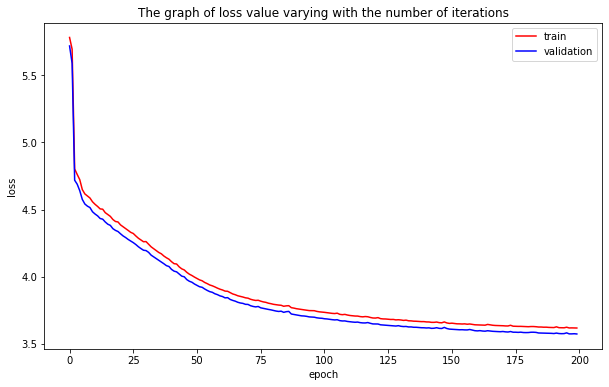

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varying with the number of iterations")